In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_data=pd.read_csv("Dataset_LR/BankChurners.csv")

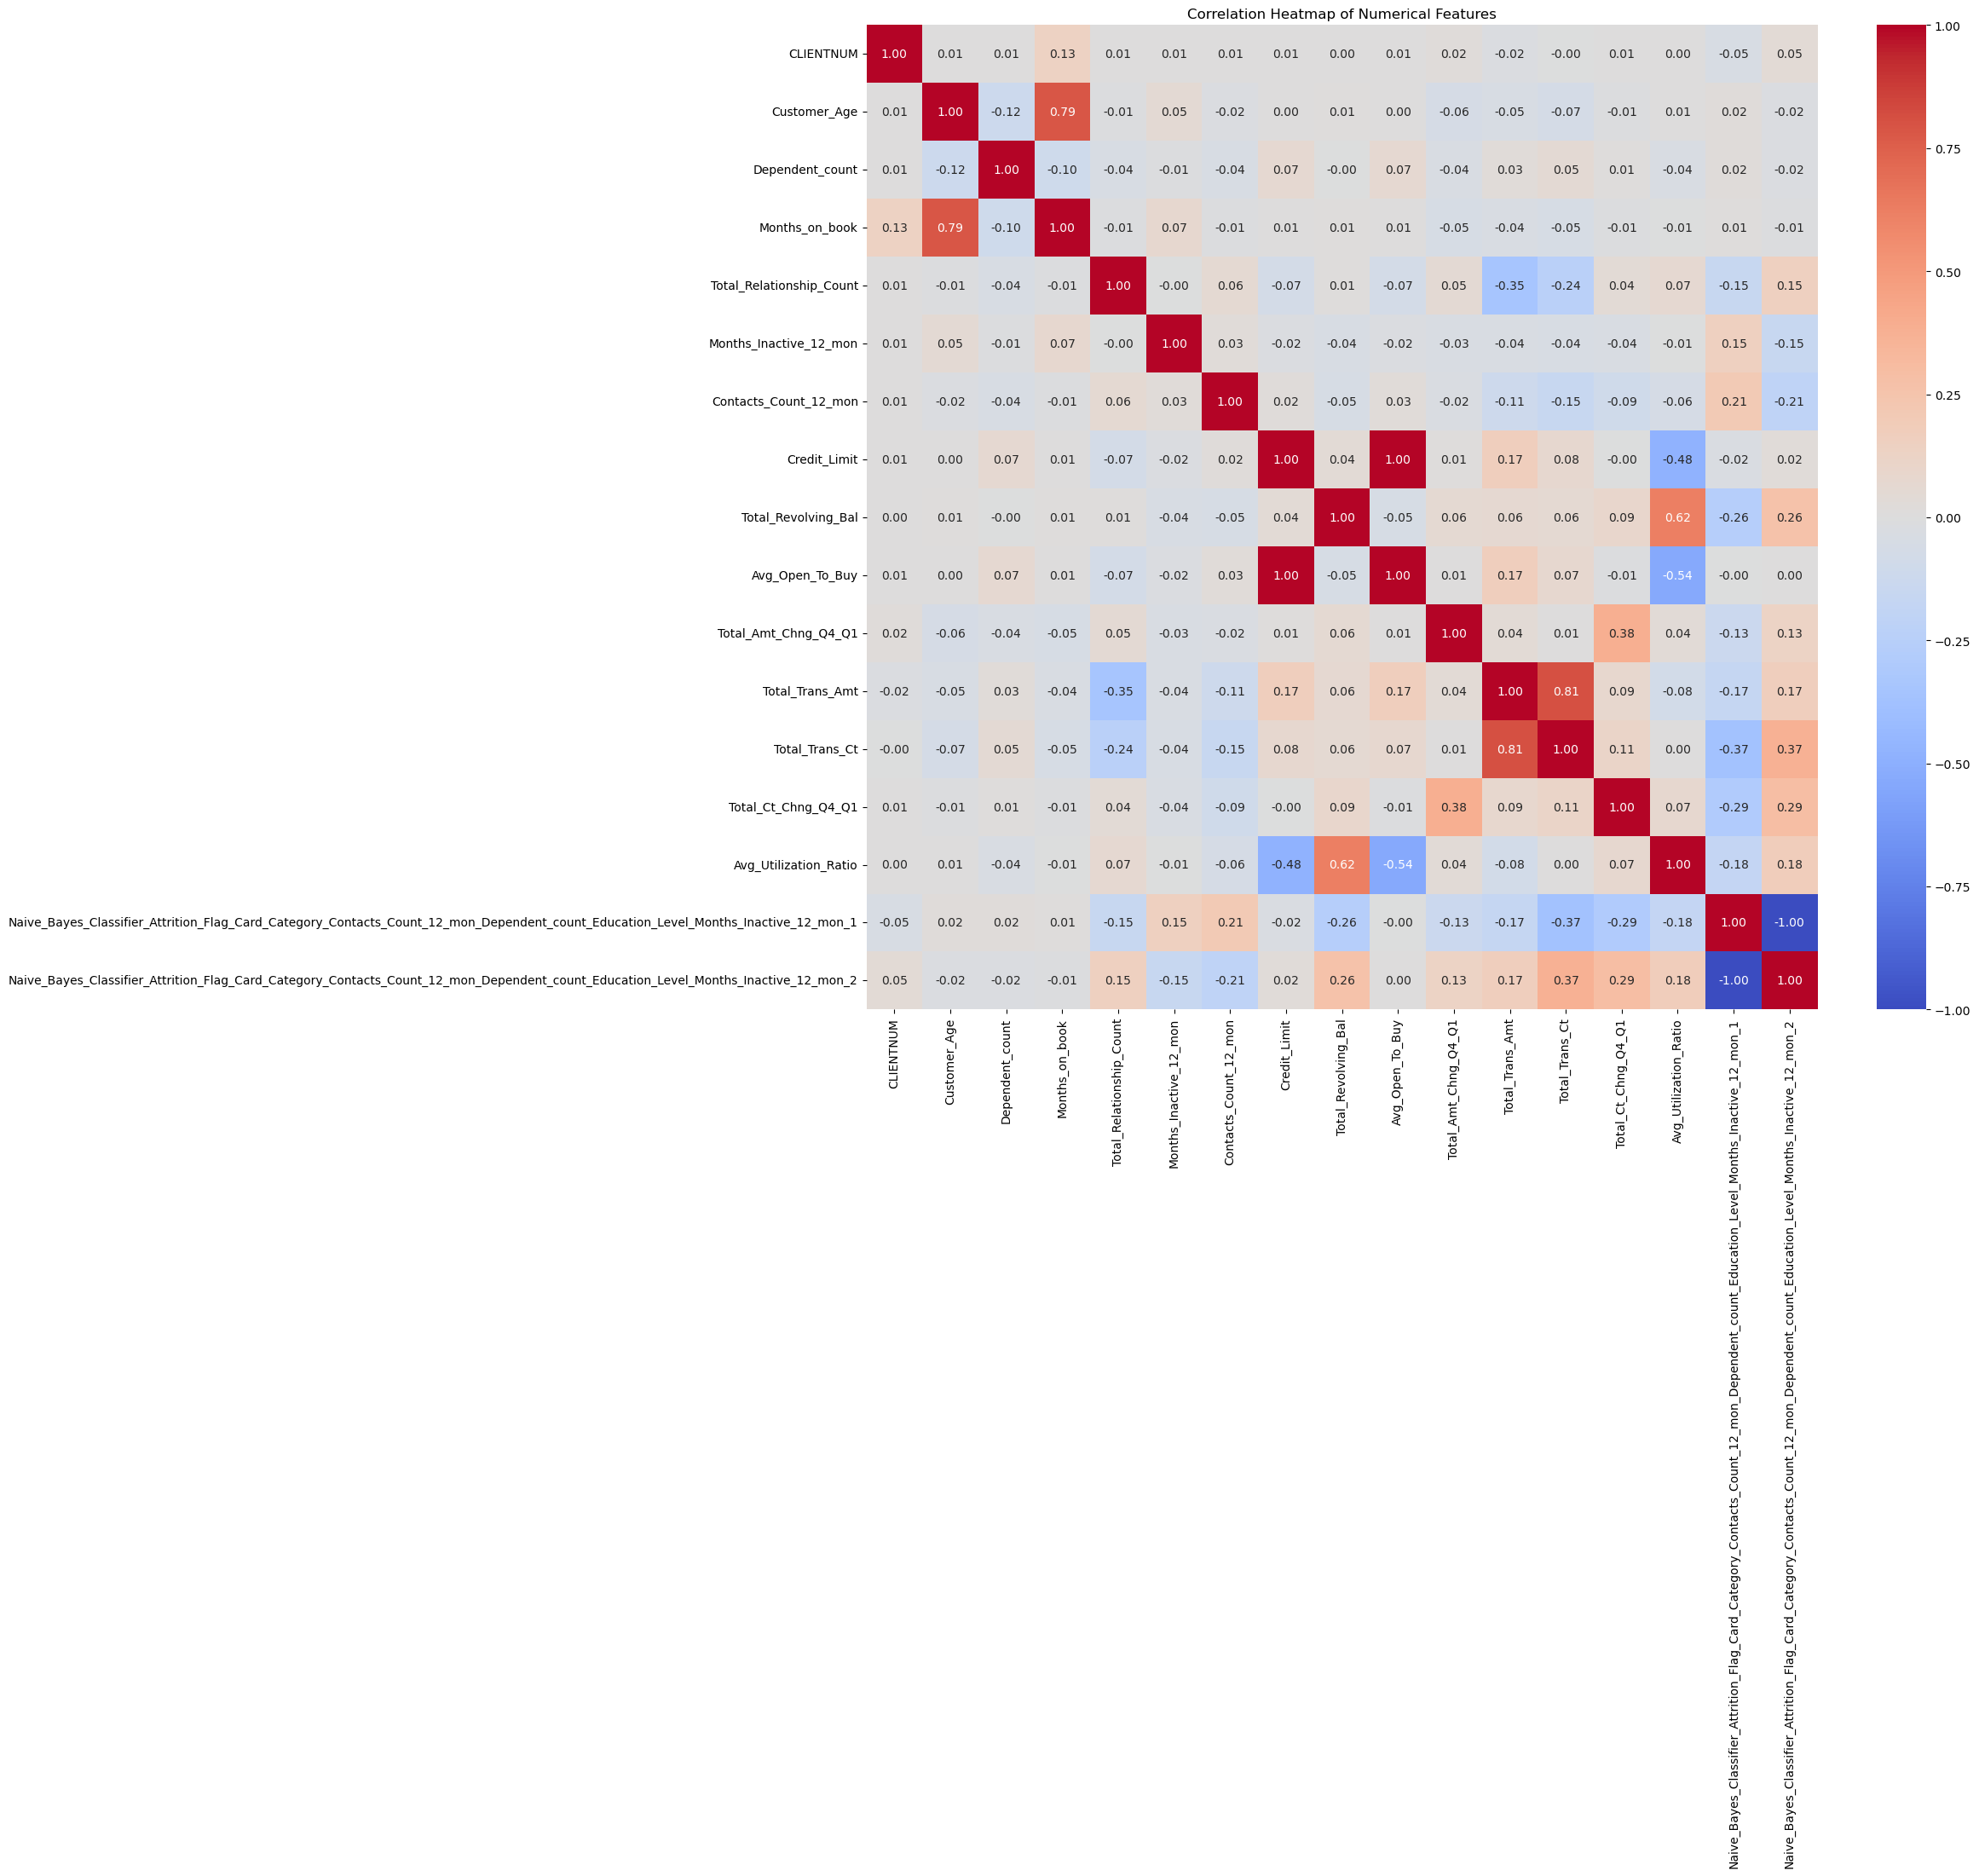

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your DataFrame is named 'bank_data'
# Replace 'bank_data' with your actual DataFrame if needed

# Creating a DataFrame from the provided features and values
data = {
    'CLIENTNUM': [708082083, 828343083],
    'Customer_Age': [26, 73],
    'Gender': ['Male', 'Female'],
    'Dependent_Count': ['Yes', 'No'],
    'Education_Level': ['Doctorate', 'Post-Graduate', 'Graduate', 'College', 'High School', 'Uneducated'],
    'Marital_Status': ['Divorced', 'Married', 'Single'],
    'Income_Category': ['Less than 40K', '40K-60K', '60K-80K', '80K-120K', '120K+'],
    'Card_Category': ['Blue', 'Gold', 'Silver', 'Platinum'],
    'Total_Relationship_Count': [1, 6],
    'Months_Inactive_12_mon': [0, 6],
    'Contacts_Count_12_mon': [0, 6],
    'Credit_Limit': [1438.4, 34516],
    'Total_Revolving_Bal': [0, 2517],
    'Avg_Open_To_Buy': [3, 34516],
    'Total_Amt_Chng_Q4_Q1': [0, 3.397],
    'Total_Trans_Amt': [510, 18484],
    'Total_Trans_Ct': [10, 139],
    'Total_Ct_Chng_Q4_Q1': [0, 3.714],
    'Avg_Utilization_Ratio': [0, 0.999],
    'Attrition': ['Attrited Customer', 'Existing Customer']
}


# Selecting only the numerical columns for the heatmap
numerical_columns = bank_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = bank_data[numerical_columns].corr()

# Set up the matplotlib figure with increased size
plt.figure(figsize=(18, 15))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Save the plot as a PNG file
plt.title("Correlation Heatmap of Numerical Features")
plt.savefig('correlation_heatmap.png')

# Show the plot (optional)
plt.show()


In [18]:
bank_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

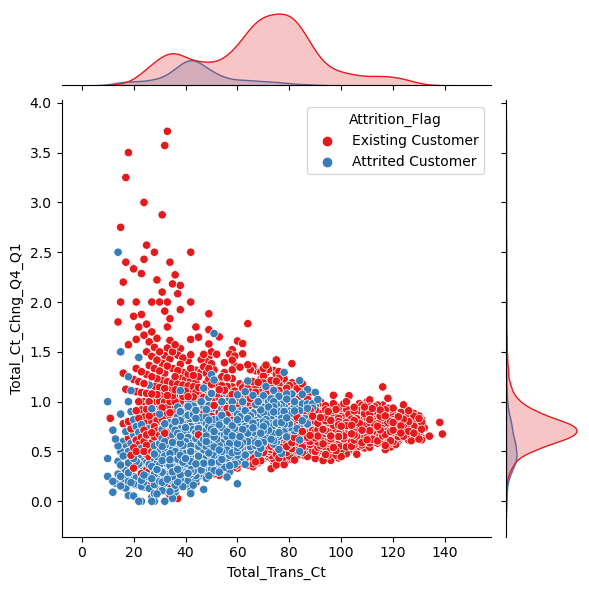

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your DataFrame is named 'bank_data'
# Replace 'bank_data' with your actual DataFrame if needed

# Selecting two numerical features for the scatter plot
x_feature = 'Total_Trans_Ct'
y_feature = 'Total_Ct_Chng_Q4_Q1'

# Creating a joint plot (scatter plot + histograms)
sns.jointplot(data=bank_data, x=x_feature, y=y_feature, hue='Attrition_Flag', palette='Set1', kind='scatter')

# Adding labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)

plt.savefig('scatterwithhis.png')
# Showing the plot
plt.show()


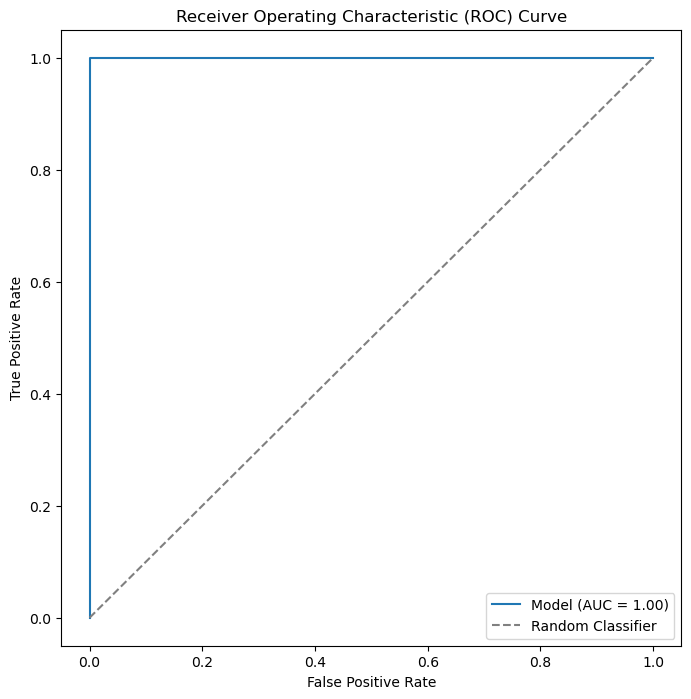

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Example data (replace these with your actual data)
true_labels = [0, 1, 1, 0, 1, 0]  # Actual labels (0: negative class, 1: positive class)
predicted_probabilities = [0.2, 0.8, 0.6, 0.3, 0.7, 0.4]  # Predicted probabilities or scores

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'Model (AUC = {roc_auc:.2f})')

# Plotting the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()


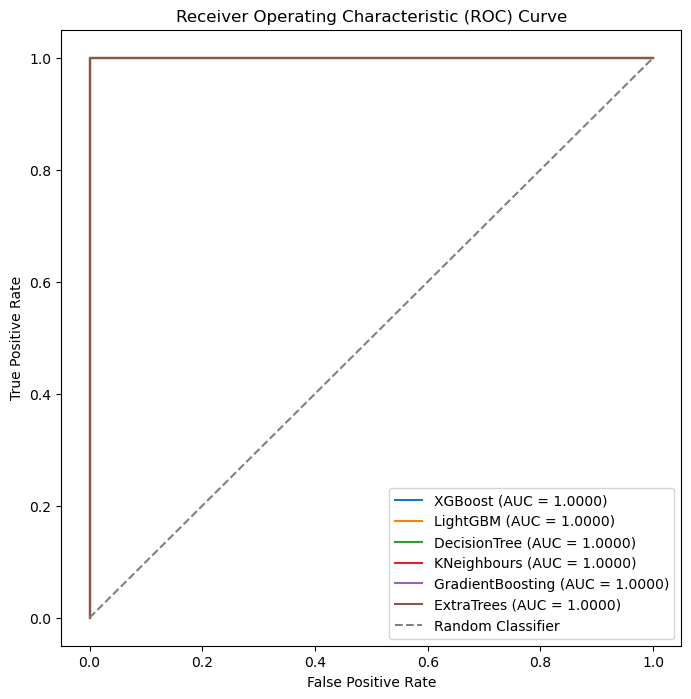

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# AUC values for different models
model_auc = {
    'XGBoost': 0.9902,
    'LightGBM': 0.9824,
    'DecisionTree': 0.9504,
    'KNeighbours': 0.8507,
    'GradientBoosting': 0.9836,
    'ExtraTrees': 0.8934
}

# Create ROC curve
plt.figure(figsize=(8, 8))

for model, auc_value in model_auc.items():
    # Creating a ROC curve based on the provided AUC
    fpr, tpr, _ = roc_curve([0, 1], [0, auc_value])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.4f})')

# Plotting the random classifier (diagonal line)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

# Adding labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Showing the plot
plt.show()
